In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path ='./cafedata/jeonnam-pricedata.csv'
df = pd.read_csv(file_path)
df.head()

,뚜레쥬르 지점,뚜레쥬르 전남강진,뚜레쥬르 나주혁신중앙,뚜레쥬르 순천선평,뚜레쥬르 순천왕지유심천,뚜레쥬르 전남고흥,뚜레쥬르 광양중마사랑,뚜레쥬르 전남구례,뚜레쥬르 목포하당중흥,뚜레쥬르 목포용해,...,뚜레쥬르 광주수완대방,뚜레쥬르 광주월계,뚜레쥬르 광주첨단대라수,뚜레쥬르 광주백운,뚜레쥬르 광주백운DT,뚜레쥬르 광주진월,뚜레쥬르 광주금남로,뚜레쥬르 광주서방,뚜레쥬르 상무,뚜레쥬르 광주동림
0,마늘 단짝 고구마,4900.0,NaN,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0,4900,...,4900.0,NaN,4900.0,4900.0,4900.0,4900,4900.0,4900.0,4900.0,4900.0
1,깊은 밤 뺑스위스,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0,NaN,...,4300.0,NaN,4300.0,4300.0,4300.0,4300,4300.0,4300.0,4300.0,4300.0
2,BELT 샌드위치,NaN,6900.0,6900.0,7300.0,7000.0,7100.0,7000.0,7200.0,6900,...,6900.0,6900.0,8500.0,6900.0,6900.0,6900,NaN,6900.0,6900.0,6900.0
3,BLT콥 샐러드,NaN,8500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500.0,8500.0,NaN
4,쉬림프 에그 샐러드,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,10500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import re

def categorize_menu(df):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    df['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(df['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                df.loc[idx, '카테고리'] = category
                break
    
    return df

def analyze_categories_by_store(df):
    # 매장별 카테고리별 기본 통계
    stores = df.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        df[store] = pd.to_numeric(df[store], errors='coerce')
        
        temp = df.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    df = pd.read_csv(filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return df, pivot_table

# 파일 처리 및 결과 생성
df, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(df.head())
########################################################################################################################

storeinfo_filepath='./adress_process/뚜레쥬르_매장정보_전라남도_수정.csv'

def process_address(address):
    try:
        # 수동 수정
        if address == '경기도 동탄지성로469번길 60 5단지 상가1동107호,108호,109호':
            return '경기도 화성시'
   
        # 정규표현식으로 '전라남도 XX시' 추출
        match = re.match(r'광주광역시 \w+구', address) or re.match(r'전라남도\s+\w+시', address) or re.match(r'전라남도\s+\w+군', address)

        if match:
            return match.group()
        
        # 기본값 반환
        return address
    except Exception as e:
        print(f"주소 처리 중 오류 발생: {address}, {e}")
        return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    df = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    df = categorize_menu(df)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(df)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return df, result

# 실제 파일 경로로 호출
df, result = process_bakery_data('./cafedata/jeonnam-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_전라남도_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)

result.to_csv('anal_jeonnam/시별_카테고리_평균가격.csv', encoding='utf-8-sig')


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 광양중마사랑,전라남도 광양시,전남,2960.0,4238.9,7100.0,NaN,5090.9,4600.0,3340.0,2600.0,3000.0
1,뚜레쥬르 광주금남로,광주광역시 동구,전남,2985.7,3944.0,NaN,NaN,4500.0,4600.0,2400.0,2933.3,2950.0
2,뚜레쥬르 광주동림,광주광역시 서구,전남,3284.6,4404.7,7137.5,8350.0,5100.0,4600.0,3516.7,2933.3,3220.0
3,뚜레쥬르 광주백운,광주광역시 남구,전남,3045.5,4147.1,7133.3,NaN,4762.5,4600.0,3337.5,2933.3,3180.0
4,뚜레쥬르 광주백운DT,광주광역시 남구,전남,3045.5,4128.8,7133.3,NaN,4762.5,4600.0,3337.5,2933.3,3200.0
5,뚜레쥬르 광주서방,광주광역시 북구,전남,2671.4,3777.1,7340.0,8500.0,4866.7,4600.0,3514.3,3100.0,3025.0
6,뚜레쥬르 광주수완대방,광주광역시 광산구,전남,2990.0,4439.5,7150.0,NaN,5054.5,4600.0,3257.1,2400.0,3200.0
7,뚜레쥬르 광주월계,광주광역시 광산구,전남,3000.0,4295.6,7175.0,NaN,5375.0,NaN,3637.5,2933.3,3040.0
8,뚜레쥬르 광주진월,광주광역시 남구,전남,2790.0,4226.1,7111.1,8350.0,4933.3,4600.0,3333.3,2933.3,3025.0
9,뚜레쥬르 광주첨단대라수,광주광역시 광산구,전남,2600.0,4272.5,8500.0,8500.0,5254.5,4600.0,3460.0,2800.0,3116.7


In [4]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_jeonnam/시별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,전라남도 순천시,4977.162500
1,전라남도 무안군,4855.387500
2,전라남도 목포시,4824.962500
3,전라남도 완도군,4781.400000
4,광주광역시 광산구,4760.150000
5,전라남도 여수시,4745.412500
6,광주광역시 서구,4716.693750
7,광주광역시 북구,4702.175000
8,전라남도 나주시,4674.337500
9,광주광역시 남구,4657.508333


In [5]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean().round(2)

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_jeonnam/시군별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
광주광역시 광산구,2863.33,7608.33,8500.0,5228.00,4600.00,3451.53,2711.10,3118.90
광주광역시 남구,2960.33,7125.90,8350.0,4819.43,4600.00,3336.10,2933.30,3135.00
광주광역시 동구,2985.70,NaN,NaN,4500.00,4600.00,2400.00,2933.30,2950.00
광주광역시 북구,2671.40,7340.00,8500.0,4866.70,4600.00,3514.30,3100.00,3025.00
광주광역시 서구,2712.30,7198.75,8425.0,5100.00,4600.00,3641.70,2933.30,3122.50
전라남도 강진군,3100.00,7260.00,NaN,5750.00,4600.00,2960.00,3133.30,3333.30
전라남도 고흥군,2550.00,7155.60,NaN,5191.70,4600.00,3160.00,2933.30,2950.00
전라남도 광양시,2960.00,7100.00,NaN,5090.90,4600.00,3340.00,2600.00,3000.00
전라남도 구례군,2857.10,7112.50,NaN,4720.00,4933.30,3475.00,3000.00,3100.00


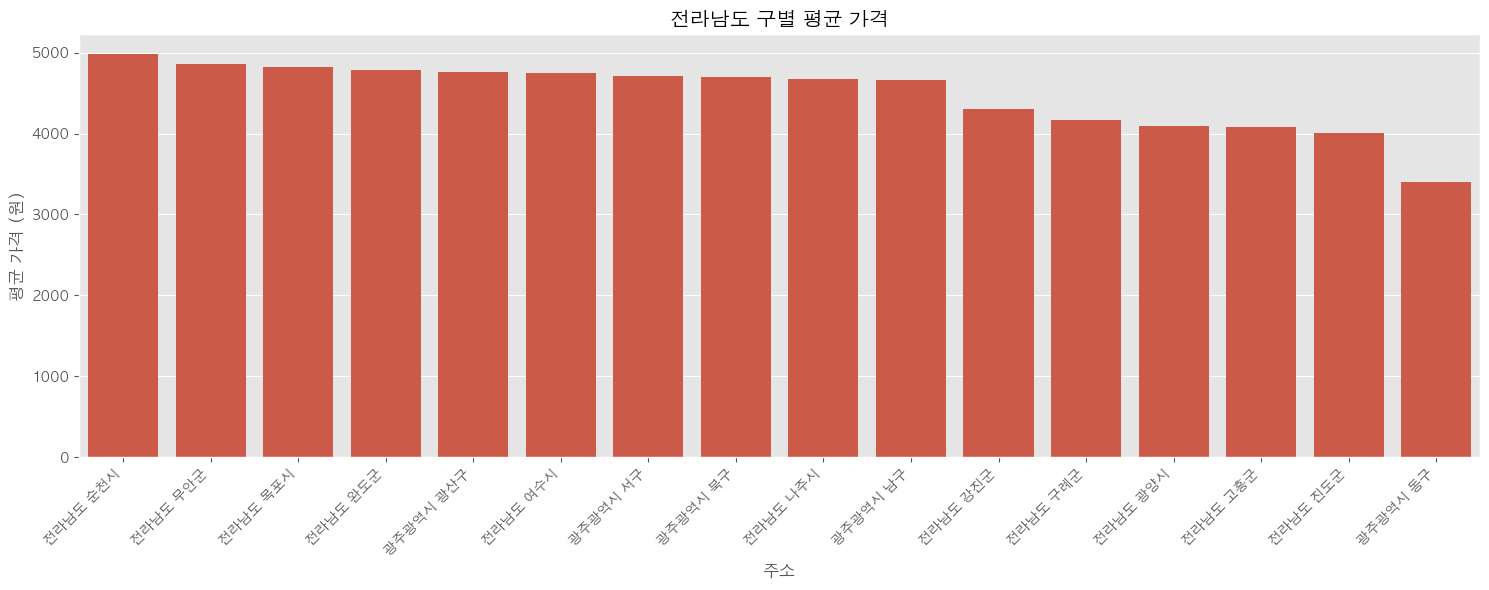

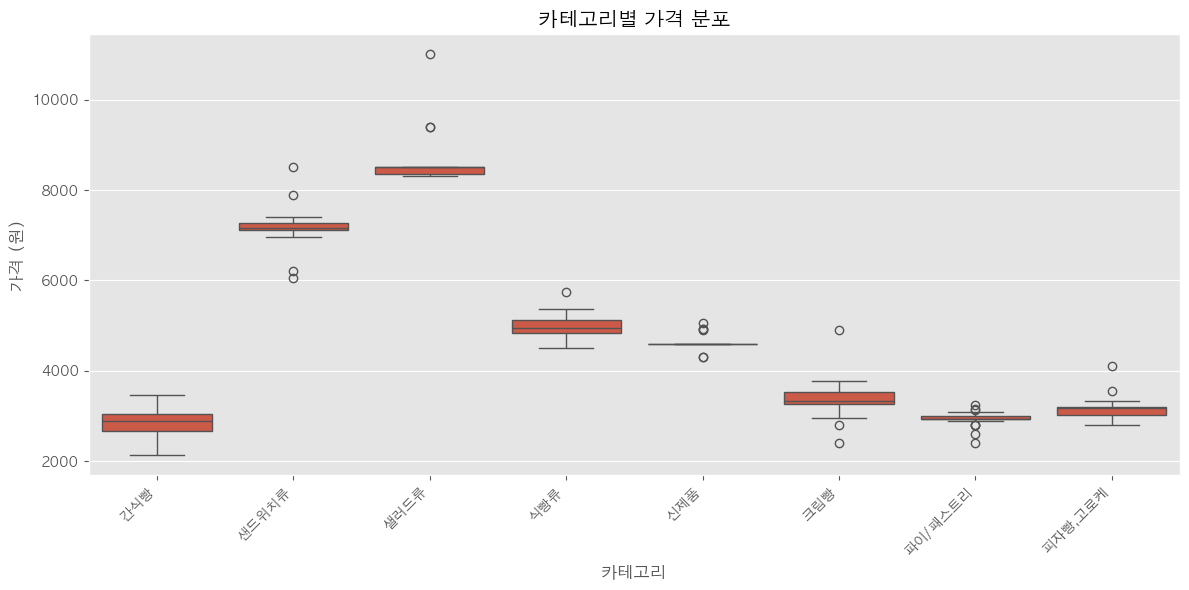

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('전라남도 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

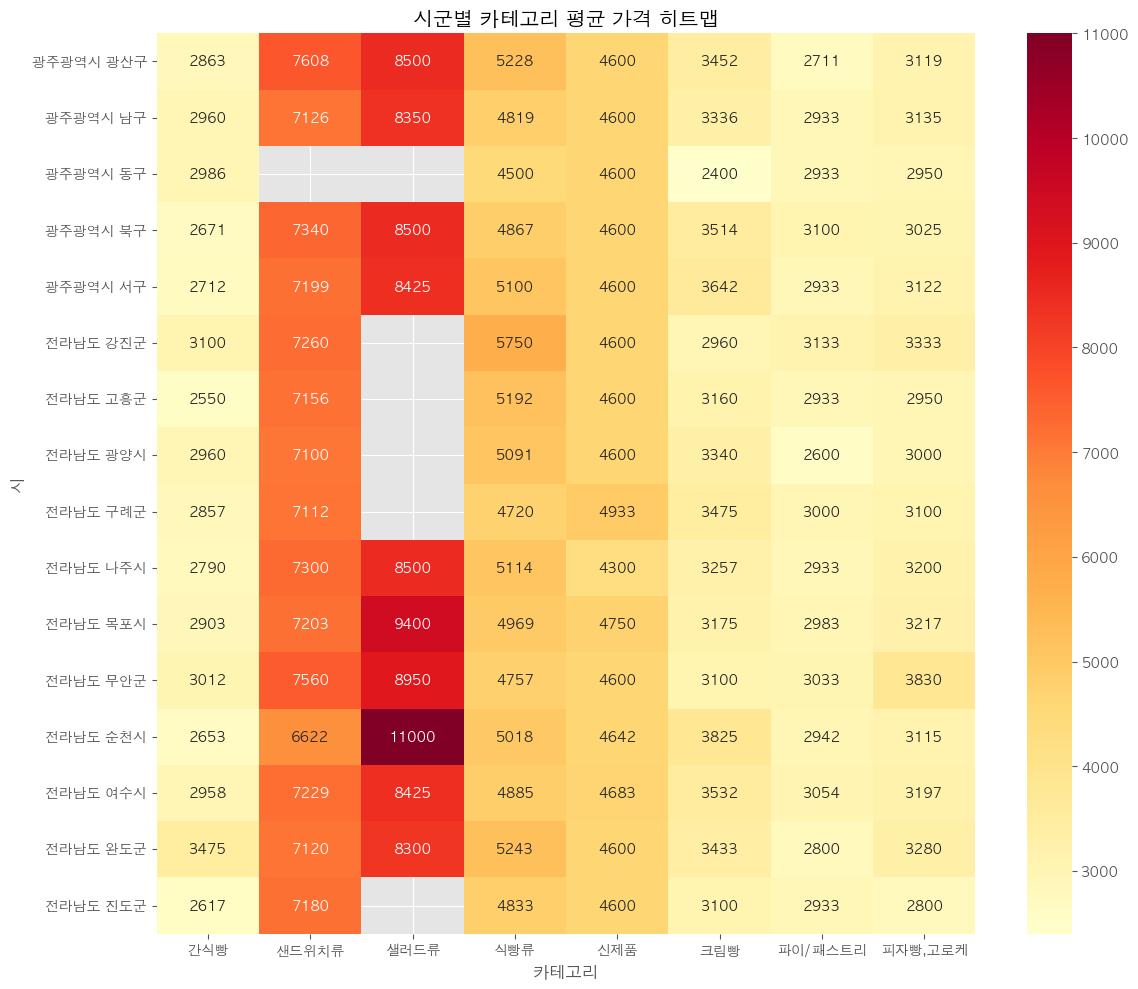

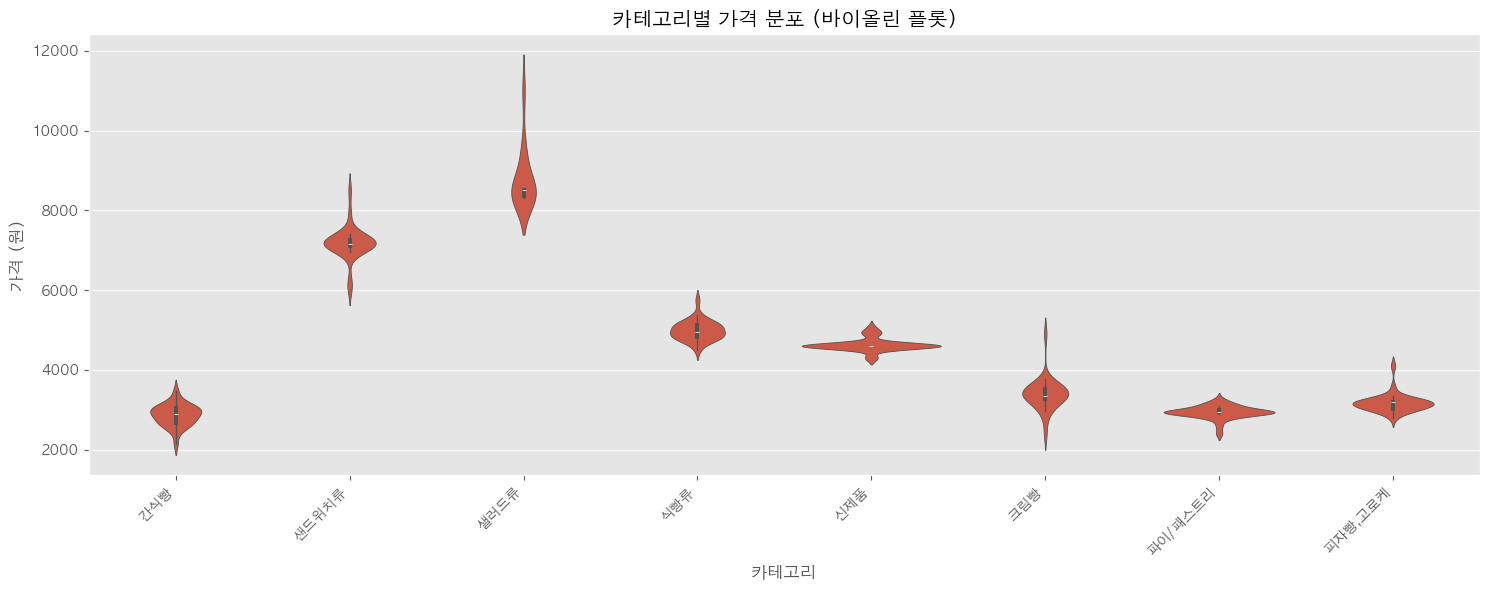

In [7]:

# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('시군별 카테고리 평균 가격 히트맵')
plt.ylabel('시')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
           구분       평균_빵가격
0   광주광역시 광산구  4760.150000
1    광주광역시 남구  4657.508333
2    광주광역시 동구  3394.833333
3    광주광역시 북구  4702.175000
4    광주광역시 서구  4716.693750
5         강진군  4305.228571
6         고흥군  4077.228571
7         광양시  4098.700000
8         구례군  4171.128571
9         나주시  4674.337500
10        목포시  4824.962500
11        무안군  4855.387500
12        순천시  4977.162500
13        여수시  4745.412500
14        완도군  4781.400000
15        진도군  4009.042857

전처리 후 아파트 가격 데이터:
           구분     매매   전세
1         강진군  453.0  230
2         고흥군  383.0  171
3         곡성군  370.0  213
4         광양시  357.0  296
5         나주시  658.0  473
6         담양군  460.0  267
7         목포시  465.0  369
8         무안군  728.0  570
9         보성군  417.0  300
10        순천시  622.0  499
11        여수시  723.0  519
12        영광군  553.0  395
13        영암군  300.0  205
14        완도군  584.0  310
15        장성군  303.0  200
16        장흥군  653.0  467
17        해남군  614.0  422
18        화순군  459.0  349
19  광주광역시 

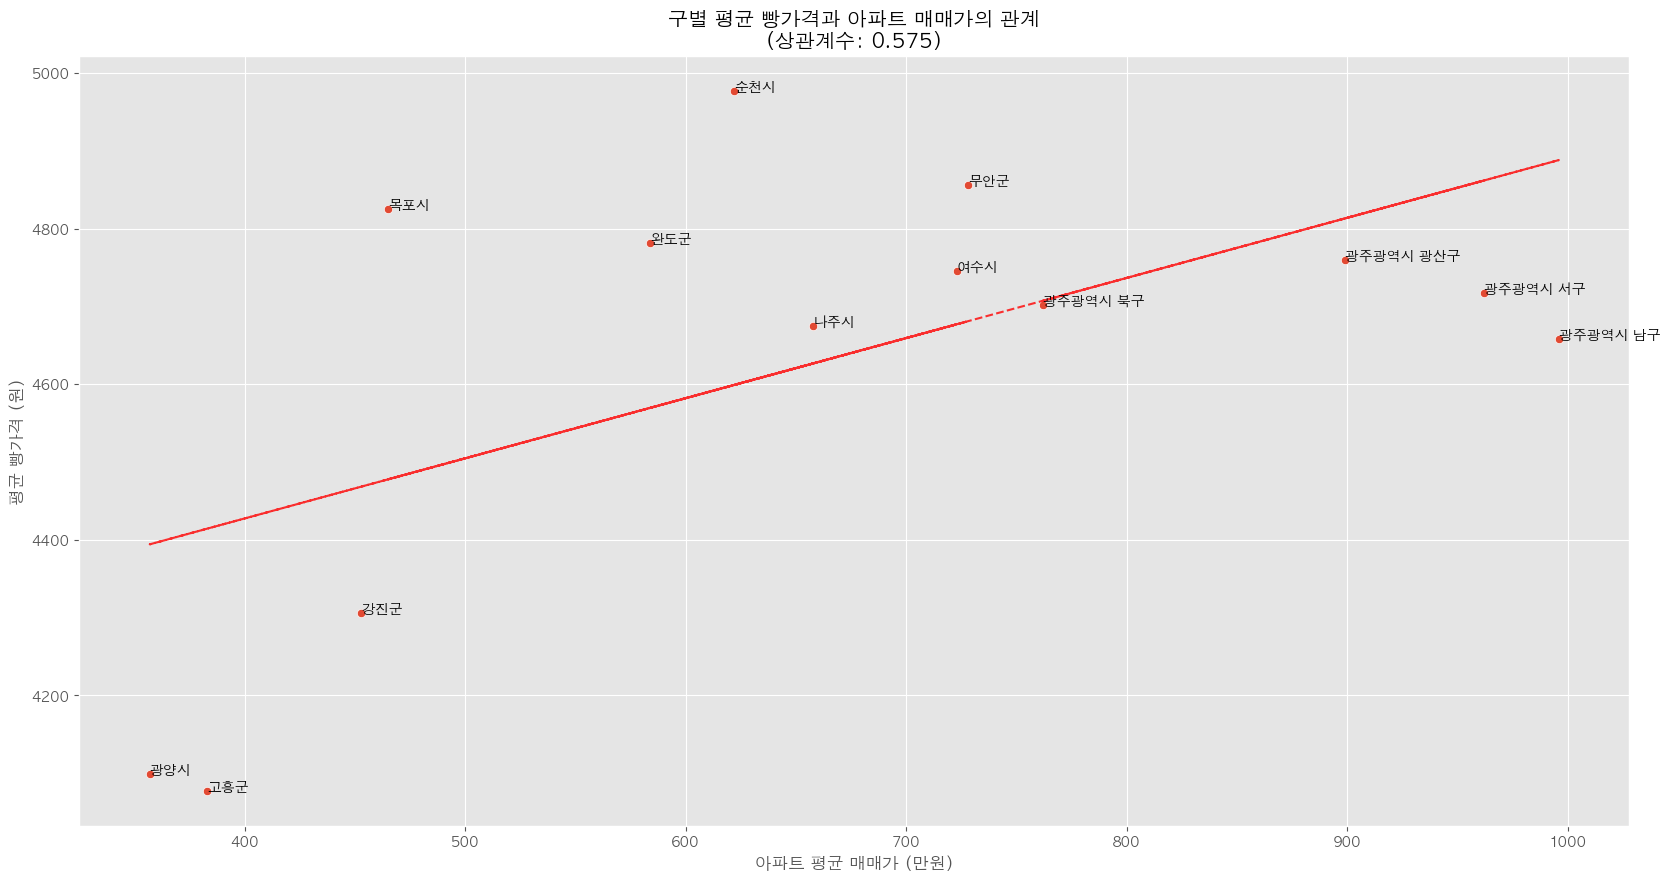

In [8]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '경기도'제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('전라남도', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('anal_jeonnam/jeonnam_APT_PRICE.csv')
# '경기도'와 '구' 제거
apt_price['구분'] = apt_price['구분'].str.replace('전라남도', '').str.strip()

apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거
apt_price = apt_price[apt_price['구분'] != '광주광역시 동구']

# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'구별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")

In [9]:
jbile_path ='./cafedata/jeonbuk-pricedata.csv'
jbdf = pd.read_csv(jbile_path)
jbdf.head()

,뚜레쥬르 지점,뚜레쥬르 군산디오션,뚜레쥬르 군산터미널,뚜레쥬르 김제검산,뚜레쥬르 삼례농협하나로마트,뚜레쥬르 익산제일,뚜레쥬르 익산부송,뚜레쥬르 전주하가,뚜레쥬르 전주서신,뚜레쥬르 전주신일강변,뚜레쥬르 전주효자1가,뚜레쥬르 카페정읍수성
0,마늘 단짝 고구마,4900.0,4900.0,4900.0,4900.0,NaN,4900.0,4900.0,4900.0,4900.0,4900.0,4900.0
1,깊은 밤 뺑스위스,4300.0,4300.0,4300.0,4300.0,NaN,4300.0,4300.0,4300.0,4300.0,4300.0,4300.0
2,BELT 샌드위치,6900.0,NaN,7100.0,6900.0,6900.0,NaN,6900.0,6900.0,NaN,6900.0,6900.0
3,BLT콥 샐러드,NaN,8500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,쉬림프 에그 샐러드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500.0


In [10]:
import re

def categorize_menu(jbdf):
    # 키워드 기반 카테고리 매핑 딕셔너리
    category_keywords = {
        '샌드위치류': ['샌드위치', 'BELT', 'BLT', 'V.E.L.T'],
        '샐러드류': ['샐러드'],
        '식빵류': ['식빵', '우유롤', '우유 브레드', '소버식빵'],
        '크림빵': ['크림가득 메론빵','마담 얼그레이 크림번','순진우유크림빵','겹겹이 연유 크림 데니쉬','사르르 고구마케이크빵','사르르 우유크림빵','빵속에리얼초코','카페모카크림빵','까까웨뜨'],
        '피자빵,고로케': ['고로케', '소시지브레드','피자토스트','NEW어니언소시지포카치아'],
        '파이/패스트리': ['바통쉬크레','크라상','애플파이','유자파이'],
        '간식빵': ['소금버터롤','치즈방앗간','깨찰빵','소보로빵','오리지널 커피번','카페모카빵','꽈배기','옛날 단팥 도넛',r'^단팥빵$','단팥소보로빵'],
        '신제품': ['마구마구', '단짝', '뺑스위스']
    }
    
    # 새로운 카테고리 컬럼 생성
    jbdf['카테고리'] = '기타'  # 기본값
    
    # 각 메뉴명에 대해 카테고리 매핑
    for idx, menu_name in enumerate(jbdf['뚜레쥬르 지점']):
        if pd.isna(menu_name):  # null 체크
            continue
            
        menu_name = str(menu_name).lower()  # 소문자 변환
        
        # 각 카테고리의 키워드 체크
        for category, keywords in category_keywords.items():
            if any(keyword.lower() in menu_name for keyword in keywords):
                jbdf.loc[idx, '카테고리'] = category
                break
    
    return jbdf

def analyze_categories_by_store(jbdf):
    # 매장별 카테고리별 기본 통계
    stores = jbdf.columns[1:-1]  # 첫 번째 열(메뉴명)과 마지막 열(카테고리) 제외
    
    # 카테고리별 기본 통계
    category_stats = pd.DataFrame()
    
    for store in stores:
        # 매장별 데이터 숫자로 변환 (오류 방지)
        jbdf[store] = pd.to_numeric(jbdf[store], errors='coerce')
        
        temp = jbdf.groupby('카테고리').agg({store: 'mean'})
        temp.reset_index(inplace=True)
        temp.rename(columns={store: '평균 가격'}, inplace=True)
        temp['매장명'] = store
        category_stats = pd.concat([category_stats, temp], axis=0)

    return category_stats

def pivot_store_category(stats):
    # 피벗 테이블 생성
    pivot_table = stats.pivot_table(index='매장명', columns='카테고리', values='평균 가격', aggfunc='mean')
    pivot_table=pivot_table.round(1)
    pivot_table.reset_index(inplace=True)
    return pivot_table

# 데이터 로드 및 처리
def process_bakery_data(filepath):
    # CSV 파일 읽기
    jbdf = pd.read_csv(filepath)
    
    # 카테고리 지정
    jbdf = categorize_menu(jbdf)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(jbdf)
    
    # 피벗 테이블 생성
    pivot_table = pivot_store_category(stats)
    
    return jbdf, pivot_table

# 파일 처리 및 결과 생성
jbdf, pivot_table = process_bakery_data(file_path)

# 카테고리화된 데이터 및 매장별 통계 표시
from IPython.display import display

# print("카테고리화된 가격 데이터 (처음 5개 행)")
# display(jbdf.head())
########################################################################################################################

storeinfo_filepath='./adress_process/뚜레쥬르_매장정보_전라북도_수정.csv'

def process_address(address):
    try:
        # 수동 수정
        if address == '경기도 동탄지성로469번길 60 5단지 상가1동107호,108호,109호':
            return '경기도 화성시'
   
        # 정규표현식으로 '전라남도 XX시' 추출
        match = re.match(r'전라북도\s+\w+시', address) or re.match(r'전라북도\s+\w+군', address)
        
        if match:
            return match.group()
        
        # 기본값 반환
        return address
    except Exception as e:
        print(f"주소 처리 중 오류 발생: {address}, {e}")
        return address

def load_store_info(storeinfo_filepath):
    store_info = pd.read_csv(storeinfo_filepath)
    # 주소 컬럼 처리
    store_info['주소'] = store_info['주소'].apply(process_address)
    return store_info



def process_bakery_data(price_filepath, store_info_filepath):
    # 가격 데이터 로드
    jbdf = pd.read_csv(price_filepath)
    
    # 매장 정보 데이터 로드
    store_info = load_store_info(store_info_filepath)
    
    # 카테고리 지정
    jbdf = categorize_menu(jbdf)
    
    # 매장별 카테고리별 분석
    stats = analyze_categories_by_store(jbdf)
    
    # 피벗 테이블 생성 후 매장 정보 병합
    pivot_table = pivot_store_category(stats)
    result = pd.merge(pivot_table, store_info, 
                     left_on='매장명', 
                     right_on='매장', 
                     how='left')
    
    # 컬럼 순서 재정렬
    columns = ['매장명', '주소', '지역'] + [col for col in result.columns 
              if col not in ['매장명', '매장', '주소', '지역']]
    result = result[columns]
    
    return jbdf, result

# 실제 파일 경로로 호출
jbdf, result = process_bakery_data('./cafedata/jeonbuk-pricedata.csv', 
                                './adress_process/뚜레쥬르_매장정보_전라북도_수정.csv')

# 결과 출력
print("\n매장별 카테고리별 평균 가격 (주소 정보 포함)")
display(result)

result.to_csv('anal_jeonbuk/시별_카테고리_평균가격.csv', encoding='utf-8-sig')


매장별 카테고리별 평균 가격 (주소 정보 포함)


,매장명,주소,지역,간식빵,기타,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
0,뚜레쥬르 군산디오션,전라북도 군산시,전북,2970.0,4245.7,6950.0,8500.0,4772.7,4600.0,3566.7,2933.3,3200.0
1,뚜레쥬르 군산터미널,전라북도 군산시,전북,2790.0,4184.4,7314.3,NaN,5137.5,4600.0,3375.0,2933.3,3300.0
2,뚜레쥬르 김제검산,전라북도 김제시,전북,2737.5,4275.0,7275.0,NaN,5163.6,4600.0,3166.7,3333.3,3460.0
3,뚜레쥬르 삼례농협하나로마트,전라북도 완주군,전북,2962.5,4343.9,7060.0,8350.0,4916.7,4600.0,3480.0,3100.0,3100.0
4,뚜레쥬르 익산부송,전라북도 익산시,전북,2900.0,4248.9,7150.0,NaN,5154.5,4600.0,3033.3,2800.0,3040.0
5,뚜레쥬르 익산제일,전라북도 익산시,전북,3083.3,4593.8,7066.7,NaN,5150.0,NaN,3100.0,3100.0,3133.3
6,뚜레쥬르 전주서신,전라북도 전주시,전북,3100.0,4042.9,7170.0,NaN,4688.9,4600.0,3333.3,2800.0,3150.0
7,뚜레쥬르 전주신일강변,전라북도 전주시,전북,2983.3,4020.0,7150.0,NaN,4983.3,4600.0,3233.3,3200.0,3166.7
8,뚜레쥬르 전주하가,전라북도 전주시,전북,3462.5,4036.7,7080.0,NaN,4700.0,4600.0,3100.0,2933.3,3120.0
9,뚜레쥬르 전주효자1가,전라북도 전주시,전북,3054.5,4227.1,6533.3,NaN,4908.3,5066.7,3622.2,2933.3,3100.0


In [11]:
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

# groupby 결과를 데이터프레임으로 변환
grouped_df = pd.DataFrame(grouped_data).reset_index()

# 컬럼명 변경
grouped_df.columns = ['주소', '평균가격']

# CSV 파일로 저장
grouped_df.to_csv('anal_jeonbuk/시별_빵_평균가격.csv', index=False, encoding='utf-8-sig')
grouped_df

,주소,평균가격
0,전라북도 정읍시,4768.137500
1,전라북도 군산시,4715.175000
2,전라북도 완주군,4696.150000
3,전라북도 김제시,4248.014286
4,전라북도 전주시,4156.175000
5,전라북도 익산시,4136.507143


In [12]:
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']

# 각 카테고리별로 구의 평균 가격 계산
grouped_data = {}
for category in categories:
    grouped_data[category] = result.groupby('주소')[category].mean()

# 데이터프레임 생성
grouped_df = pd.DataFrame(grouped_data)

# CSV 파일로 저장
grouped_df.to_csv('anal_jeonbuk/시군별_카테고리_평균가격.csv', encoding='utf-8-sig')
grouped_df

,간식빵,샌드위치류,샐러드류,식빵류,신제품,크림빵,파이/패스트리,"피자빵,고로케"
주소,,,,,,,,
전라북도 군산시,2880.000,7132.150,8500.0,4955.100,4600.000,3470.85,2933.30,3250.000
전라북도 김제시,2737.500,7275.000,NaN,5163.600,4600.000,3166.70,3333.30,3460.000
전라북도 완주군,2962.500,7060.000,8350.0,4916.700,4600.000,3480.00,3100.00,3100.000
전라북도 익산시,2991.650,7108.350,NaN,5152.250,4600.000,3066.65,2950.00,3086.650
전라북도 전주시,3150.075,6983.325,NaN,4820.125,4716.675,3322.20,2966.65,3134.175
전라북도 정읍시,2855.600,6770.000,8800.0,5111.100,4600.000,3916.70,2966.70,3125.000


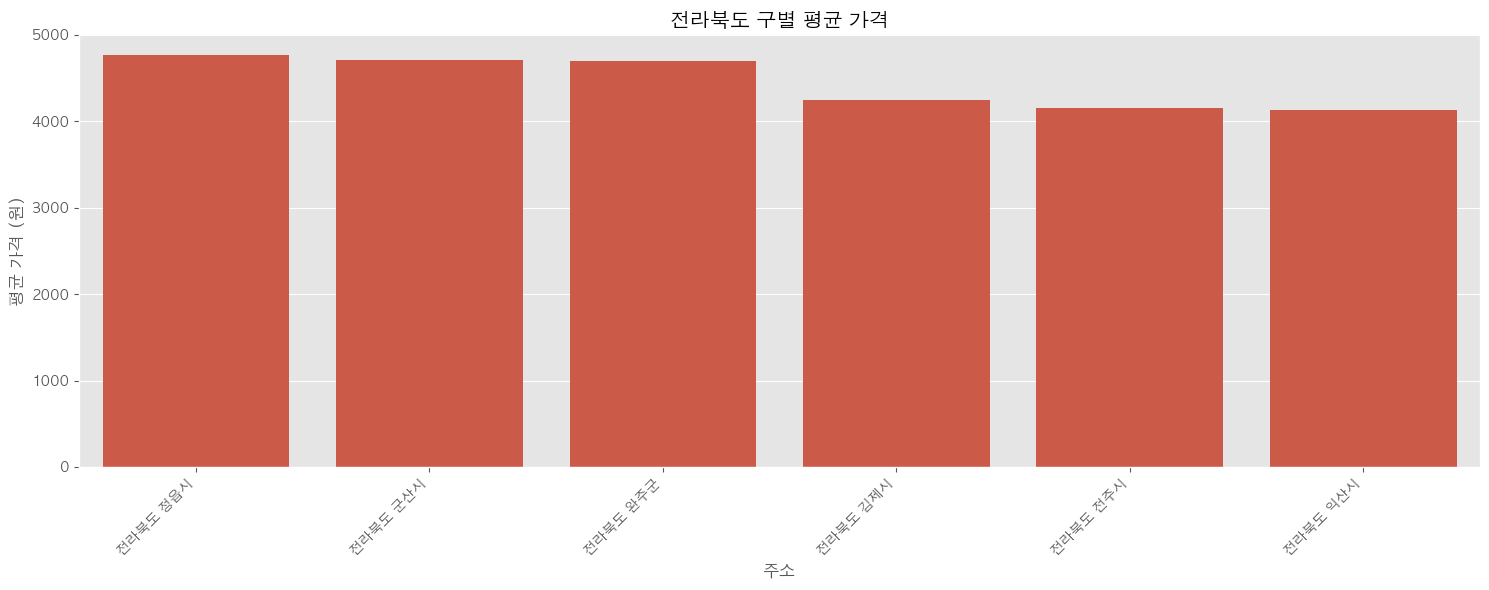

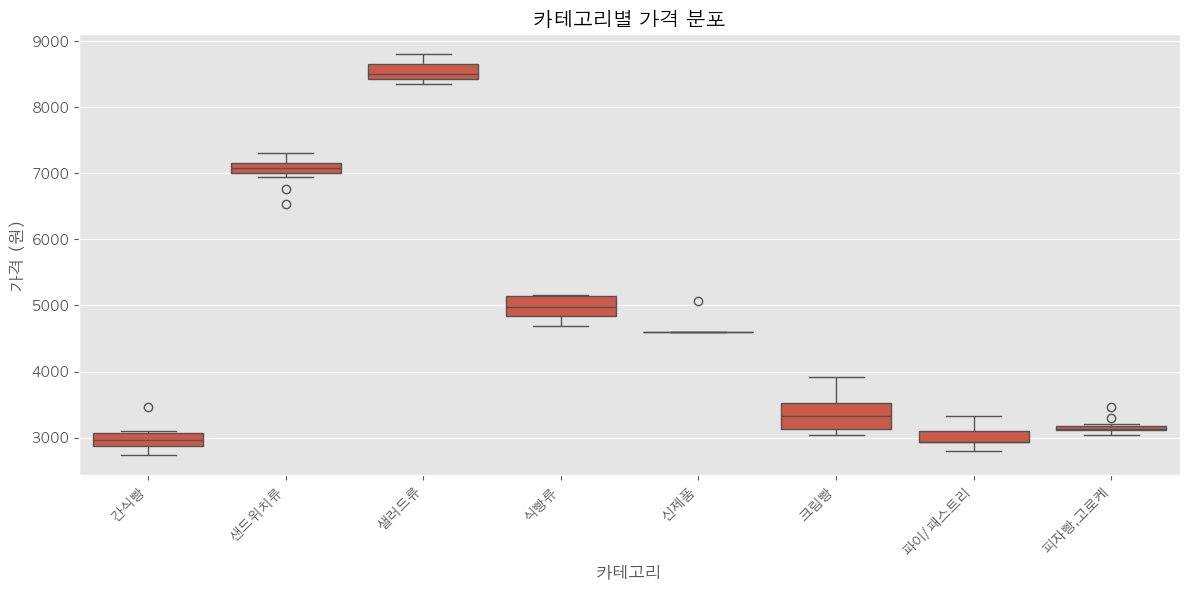

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc

# Mac OS 용 폰트 설정
plt.rc('font', family='AppleGothic') # 맥용 폰트 설정

# 그래프 기본 설정
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')


# 1. 구별 전체 평균 가격 분석
plt.figure(figsize=(15, 6))
grouped_data = result.groupby('주소')[['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']].mean().mean(axis=1).sort_values(ascending=False)

sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.title('전라북도 구별 평균 가격')
plt.xticks(rotation=45, ha='right')
plt.ylabel('평균 가격 (원)')
plt.tight_layout()
plt.show()

# 2. 카테고리별 가격 분포 (박스플롯)
plt.figure(figsize=(12, 6))
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
data_melted = pd.melt(result, value_vars=categories)

sns.boxplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

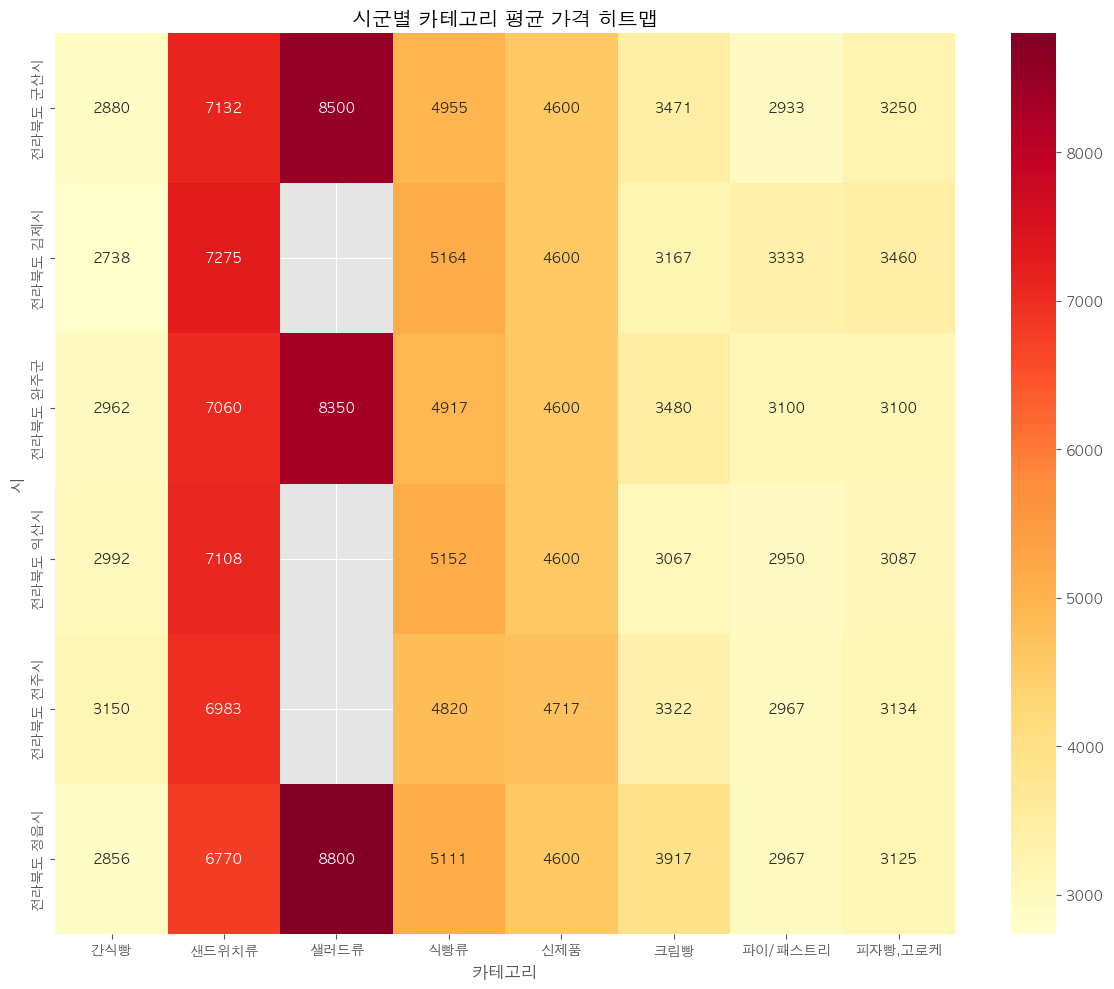

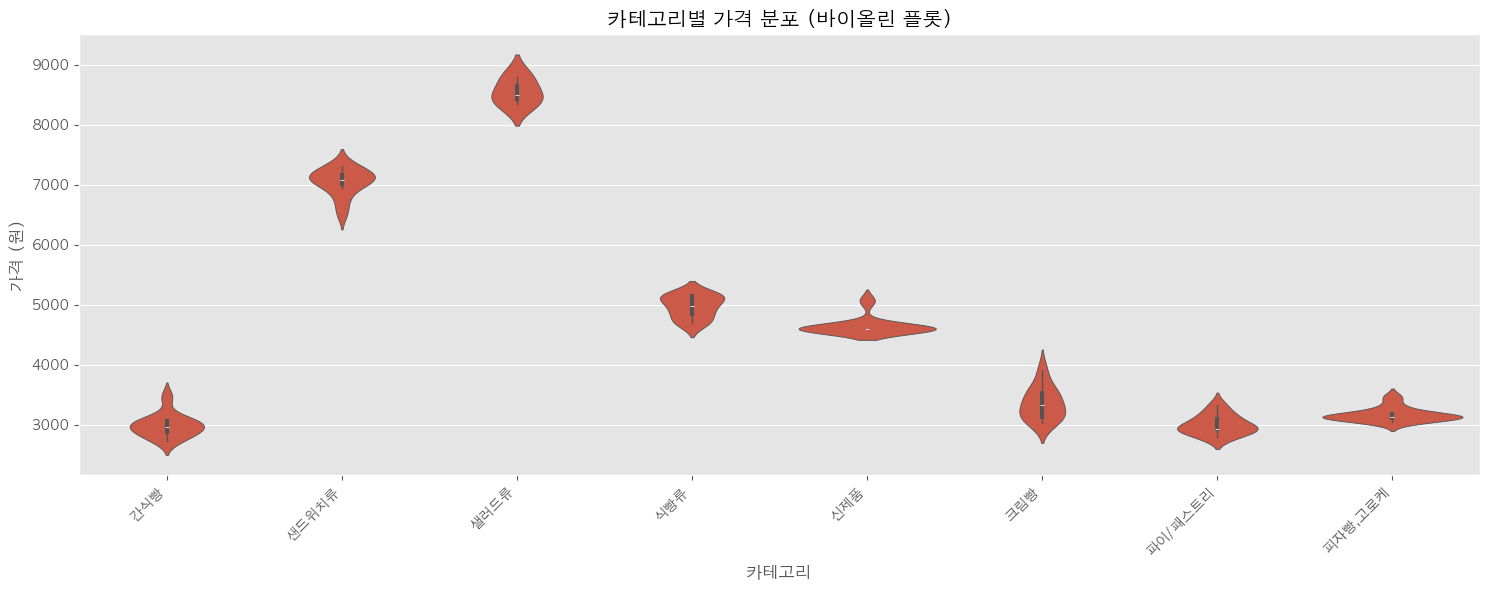

In [14]:

# 3. 구별/카테고리별 평균 가격 히트맵
plt.figure(figsize=(12, 10))
pivot_data = result.groupby('주소')[categories].mean()
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('시군별 카테고리 평균 가격 히트맵')
plt.ylabel('시')
plt.xlabel('카테고리')
plt.tight_layout()
plt.show()

# 5. 카테고리별 가격 분포 (바이올린 플롯)
plt.figure(figsize=(15, 6))
sns.violinplot(x='variable', y='value', data=data_melted)
plt.title('카테고리별 가격 분포 (바이올린 플롯)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('카테고리')
plt.ylabel('가격 (원)')
plt.tight_layout()
plt.show()

전처리 후 구별 빵가격 데이터:
    구분       평균_빵가격
0  군산시  4715.175000
1  김제시  4248.014286
2  완주군  4696.150000
3  익산시  4136.507143
4  전주시  4156.175000
5  정읍시  4768.137500

전처리 후 아파트 가격 데이터:
     구분     매매   전세
1   고창군  567.0  356
2   군산시  505.0  408
3   김제시  455.0  319
4   남원시  507.0  339
5   무주군  411.0  286
6   부안군  585.0  383
7   순창군  384.0  251
8   완주군  483.0  385
9   익산시  520.0  429
10  전주시  753.0  588
11  정읍시  512.0  355
12  진안군  377.0  219

병합된 데이터:
    구분       평균_빵가격     매매
0  군산시  4715.175000  505.0
1  김제시  4248.014286  455.0
2  완주군  4696.150000  483.0
3  익산시  4136.507143  520.0
4  전주시  4156.175000  753.0
5  정읍시  4768.137500  512.0

상관계수: -0.437
음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.


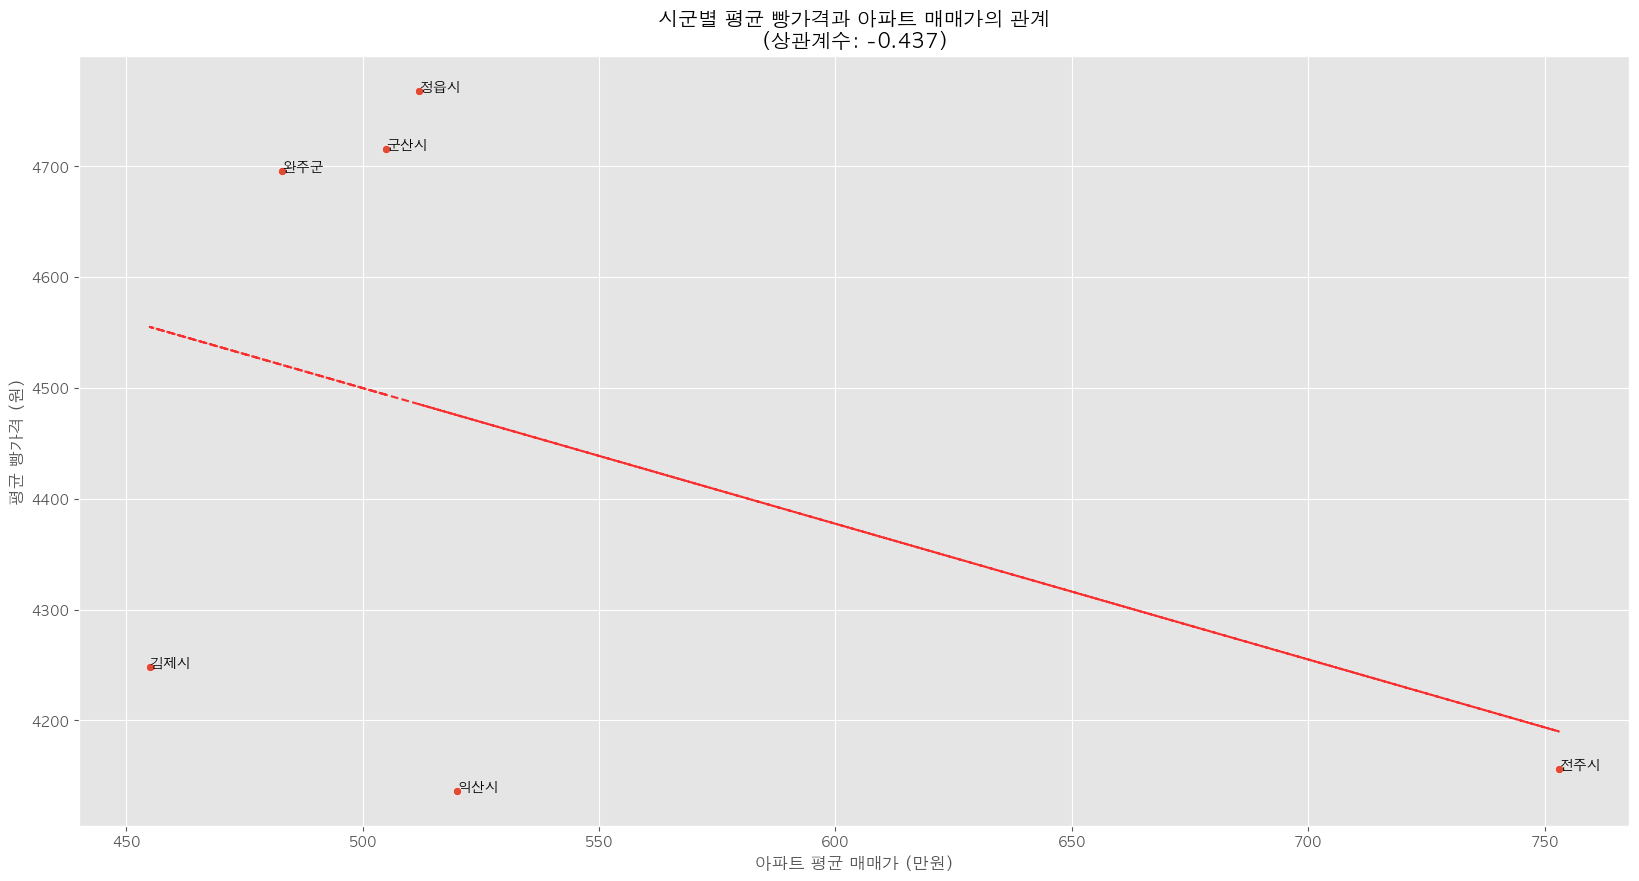

In [15]:
# 1. 구별 평균 빵가격 계산
categories = ['간식빵', '샌드위치류', '샐러드류', '식빵류', '신제품', '크림빵', '파이/패스트리', '피자빵,고로케']
bread_price_by_district = result.groupby('주소')[categories].mean().mean(axis=1).reset_index()
bread_price_by_district.columns = ['구분', '평균_빵가격']
# '전라북도'제거
bread_price_by_district['구분'] = bread_price_by_district['구분'].str.replace('전라북도', '').str.strip()

# 아파트 가격 데이터 전처리
apt_price = pd.read_csv('anal_jeonbuk/jeonbuk_APT_PRICE.csv')
# '전라북도'제거
apt_price['구분'] = apt_price['구분'].str.replace('전라북도', '').str.strip()

apt_price['매매'] = pd.to_numeric(apt_price['매매'].str.replace(',', ''), errors='coerce')
apt_price = apt_price.dropna()  # 결측치 제거


# 데이터 확인
print("전처리 후 구별 빵가격 데이터:")
print(bread_price_by_district)
print("\n전처리 후 아파트 가격 데이터:")
print(apt_price)

# 데이터 병합
merged_df = pd.merge(bread_price_by_district, apt_price[['구분', '매매']], on='구분', how='inner')
print("\n병합된 데이터:")
print(merged_df)

# 시각화
if not merged_df.empty:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=merged_df, x='매매', y='평균_빵가격')
    
    # 추세선 추가
    x = merged_df['매매'].values
    y = merged_df['평균_빵가격'].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.8)
    
    # 각 점에 구 이름 표시
    for idx, row in merged_df.iterrows():
        plt.annotate(row['구분'], (row['매매'], row['평균_빵가격']))
    
    correlation = merged_df['평균_빵가격'].corr(merged_df['매매'])
    plt.title(f'시군별 평균 빵가격과 아파트 매매가의 관계\n(상관계수: {correlation:.3f})')
    plt.xlabel('아파트 평균 매매가 (만원)')
    plt.ylabel('평균 빵가격 (원)')

    print(f"\n상관계수: {correlation:.3f}")
    if correlation > 0:
        print("양의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격도 높은 경향이 있습니다.")
    else:
        print("음의 상관관계가 있습니다: 아파트 가격이 높은 구일수록 빵 가격이 낮은 경향이 있습니다.")